In [5]:
# !pip install newsapi-python
# !pip install praw


### NewsAPI

In [8]:
from newsapi import NewsApiClient
import requests
import pandas as pd
import os
import re
from sklearn.feature_extraction.text import CountVectorizer
import praw
import time

In [6]:
API_KEY = '81ba3d1072694473be6467501e8280bb'

In [7]:
newsapi = NewsApiClient(api_key='81ba3d1072694473be6467501e8280bb')

In [ ]:
pro_ev = ["benefits of electric vehicles","EVs lower fuel costs","EV battery recycling advancements",
          "EVs reduce carbon emissions","electric cars and climate change","EVs outperform gas cars",
          "electric vehicles sustainability","EV adoption trends","EV tax credits and subsidies",
          "future of electric cars","government incentives for EVs","electric cars cost savings",
          "EVs and clean energy","EVs and renewable energy","long-term benefits of EVs",
          "zero-emission vehicles", "EVs and environmental benefits","EV charging infrastructure growth",
          "EVs reducing air pollution", "electric car sales growth"
          ]
against_ev = ["problems with electric vehicles", "EV battery production carbon footprint",
              "electric cars not sustainable", "EVs and mining pollution",
              "high cost of electric cars", "EV battery disposal issues", "range anxiety electric cars"
              "hidden environmental costs of EVs", "EVs and rare earth metal shortage",
              "grid overload from EV charging","EVs vs hybrids which is better",
              "fossil fuel impact of EV battery manufacturing", "why EVs are not the future",
              "EVs don’t reduce emissions", "problems with EV charging infrastructure"]

In [ ]:

label = []
sublabel = []
title = []
description = []
for query in pro_ev:
    all_articles = newsapi.get_everything(q=query,
                                          sources='bbc-news,the-verge',
                                          domains='bbc.co.uk,techcrunch.com',
                                          from_param='2025-01-31',
                                          to='2018-01-01',
                                          language='en',
                                          sort_by='relevancy',
                                          page=1)
    for i in range(len(all_articles['articles'])):
        article = all_articles['articles'][i]

        # Categorizing based on environmental vs economic arguments
        if query in ["EVs reduce carbon emissions", "electric cars and climate change",
                     "EVs and renewable energy", "zero-emission vehicles"]:
            label.append("Environmental Benefit")
        elif query in ["EVs lower fuel costs", "government incentives for EVs",
                       "EV tax credits and subsidies", "electric cars cost savings"]:
            label.append("Economic Advantage")
        else:
            label.append("General Pro")

        sublabel.append(query)
        title.append(article['title'])
        description.append(article['description'])

for query in against_ev:
    all_articles = newsapi.get_everything(q=query,
                                          sources='bbc-news,the-verge',
                                          domains='bbc.co.uk,techcrunch.com',
                                          from_param='2025-01-31',
                                          to='2018-01-01',
                                          language='en',
                                          sort_by='relevancy',
                                          page=1)
    for i in range(len(all_articles['articles'])):
        article = all_articles['articles'][i]

        # Categorizing based on environmental vs economic arguments
        if query in ["EV battery production carbon footprint", "EVs and mining pollution",
                     "EV battery disposal issues", "fossil fuel impact of EV battery manufacturing"]:
            label.append("Environmental Concern")
        elif query in ["high cost of electric cars", "grid overload from EV charging",
                       "hidden environmental costs of EVs"]:
            label.append("Economic Challenge")
        else:
            label.append("General Against")

        sublabel.append(query)
        title.append(article['title'])
        description.append(article['description'])


In [ ]:
newsapi_data = pd.DataFrame({'Label': label, 'Sublabel': sublabel, 'Title':title, 'Description':description})
newsapi_data.to_csv('data/newsapi_data.csv', index=False)

### Guardian API

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage
website_url = "https://www.theguardian.com/business/series/ev-mythbusters"

# Fetch the webpage content
html_text = requests.get(website_url).text
soup = BeautifulSoup(html_text, 'lxml')

# Find all divs containing the articles
articles = soup.find_all('div', class_="dcr-f9aim1")

# Extract and print article titles
for article in articles:
    title_tag = article.find('h3', class_="card-headline")  # Locate the title
    if title_tag:
        title = title_tag.get_text(strip=True)  # Extract and clean title text
        print(title)

In [ ]:
label = []
description = []

website_url = "https://www.theguardian.com/business/series/ev-mythbusters"

# Fetch the webpage content
html_text = requests.get(website_url).text
soup = BeautifulSoup(html_text, 'lxml')

# Find all divs containing the articles
articles = soup.find_all('div', class_="dcr-f9aim1")

# Extract and print article titles
for article in articles:
    title_tag = article.find('h3', class_="card-headline")  # Locate the title
    if title_tag:
        title = title_tag.get_text(strip=True)  # Extract and clean title text
        label.append('Environmental Concern')
        description.append(title)

In [ ]:
scrape_data = pd.DataFrame({'Label': label, 'Description':description})
scrape_data.to_csv('data/scrape_data.csv', index=False)

In [ ]:
news_headlines = []
pages = 50
for page_num in range(1, pages+1):
  website_url = website_url = f"https://www.theguardian.com/environment/electric-cars+environment?page={page_num}"
  html_text = requests.get(website_url).text
  soup = BeautifulSoup(html_text, 'lxml')
  jobs_all = soup.find_all('div', class_="fc-container__inner")
  for jobs in jobs_all:
      newsdate = jobs.find('time', class_="fc-date-headline").text
      newsheadlinestxt = jobs.find_all('div', class_="fc-item__content")

      for headlineshtml in newsheadlinestxt:
          headlines = headlineshtml.find('span', class_="js-headline-text").text
          publishedTime = headlineshtml.find('span', class_="fc-timestamp__text").text
          news_headlines.append(headlines)

In [ ]:
classified_label = []
from transformers import pipeline

# Load a smaller, faster zero-shot classification model
classifier = pipeline("zero-shot-classification", model="cross-encoder/nli-distilroberta-base")

# Define labels
labels = ["Environmental Benefit", "Environmental Concern", "Economic Advantage", "Economic Challenge"]

# Predict labels
for sentence in news_headlines:
    result = classifier(sentence, labels)
    classified_label.append(result['labels'][0])

In [ ]:
guardian_articles_ev = pd.DataFrame({'Label': classified_label, 'Description':news_headlines})
guardian_articles_ev.to_csv('data/guardian_articles_EV.csv', index=False)

### REDDIT API

In [ ]:
# Initialize Reddit API client
reddit = praw.Reddit(
    client_id="xU8ihdTpX2zDp8MFiShXTQ",
    client_secret="PIpP_1CXccGU0mH8vircrVny3MoJfg",
    user_agent="text-mining-data"
)

# Define subreddits related to EV discussions
subreddits = ["electricvehicles", "cars", "technology", "sustainability", "environment", "energy"]

# Pro and Against EV Search Queries
pro_ev = [
    "benefits of electric vehicles", "EVs lower fuel costs", "EV battery recycling advancements",
    "EVs reduce carbon emissions", "electric cars and climate change", "EVs outperform gas cars",
]

against_ev = [
    "problems with electric vehicles", "EV battery production carbon footprint",
    "electric cars not sustainable", "EVs and mining pollution", "high cost of electric cars",
]

# Store results in a list
all_posts = []

def fetch_reddit_posts(search_terms, label, subreddit_list, limit=100):
    """Fetches posts from Reddit based on search terms and subreddit."""
    for subreddit_name in subreddit_list:
        subreddit = reddit.subreddit(subreddit_name)
        for query in search_terms:
            print(f"Searching '{query}' in r/{subreddit_name}...")
            try:
                for post in subreddit.search(query, limit=limit):
                    # Extract top comment
                    top_comment = "No comments"
                    if post.num_comments > 0:
                        post.comments.replace_more(limit=0)
                        if post.comments.list():
                            top_comment = post.comments.list()[0].body

                    # Store post details
                    all_posts.append({
                        "title": post.title,
                        "url": post.url,
                        "upvotes": post.score,
                        "subreddit": subreddit_name,
                        "query": query,
                        "label": label,
                        "top_comment": top_comment
                    })

                    time.sleep(1)  # Avoid hitting API limits
            except Exception as e:
                print(f"Error searching '{query}' in r/{subreddit_name}: {str(e)}")

# Fetch Pro-EV Posts
fetch_reddit_posts(pro_ev, "Pro-EV", subreddits, limit=50)

# Fetch Against-EV Posts
fetch_reddit_posts(against_ev, "Against-EV", subreddits, limit=50)

# Convert to DataFrame and Save to CSV
df_reddit = pd.DataFrame(all_posts)
df_reddit.to_csv("data/reddit_ev_discussions.csv", index=False)

### Reading all Saved Files and Text Processing

In [9]:
#scraping data
df_gaurdian = pd.read_csv('data/guardian_articles_EV.csv')
df_scraped_data = pd.read_csv('data/scrape_data.csv')

df_gaurdian = pd.concat([df_gaurdian, df_scraped_data]).reset_index(drop=True)
df_gaurdian.head()

,Label,Description
0,Environmental Concern,Brake pad dust can be more toxic than exhaust ...
1,Environmental Benefit,EVs and datacentres driving new global ‘age of...
2,Economic Challenge,EV drivers spend extra £85m on VAT when using ...
3,Economic Challenge,UK used electric vehicle sales hit record last...
4,Environmental Benefit,Promoting green growth does not make you an ‘e...


In [10]:
df_gaurdian.shape

(1008, 2)

In [11]:
df_gaurdian['Description'].iloc[0]

'Brake pad dust can be more toxic than exhaust emissions, study says'

In [12]:
#Data from Reddit API
df_reddit = pd.read_csv('data/reddit_ev_discussions.csv')
df_reddit = df_reddit.rename(columns={'top_comment':'Description', 'label':'Label'})
df_reddit.head()

,title,url,upvotes,subreddit,query,Label,Description
0,What are the real world benefits of AWD over F...,https://www.reddit.com/r/electricvehicles/comm...,43,electricvehicles,benefits of electric vehicles,Pro-EV,Traction in snowy conditions if you live ANYWH...
1,Benefits of Electric Vehicles (Again),https://www.reddit.com/r/electricvehicles/comm...,179,electricvehicles,benefits of electric vehicles,Pro-EV,My neighbor's truck got his catalytic converte...
2,Overlooked benefit of electric vehicles,https://www.reddit.com/r/electricvehicles/comm...,79,electricvehicles,benefits of electric vehicles,Pro-EV,I think the quicker acceleration time is proba...
3,"Future of electric busses, delivery vans, flee...",https://www.reddit.com/r/electricvehicles/comm...,21,electricvehicles,benefits of electric vehicles,Pro-EV,EVs are better vehicles by pretty much any cri...
4,Sold my Model Y after a year and here is my ad...,https://www.reddit.com/r/electricvehicles/comm...,558,electricvehicles,benefits of electric vehicles,Pro-EV,what car did you replace Model Y with?


In [14]:
df_reddit['Description'].iloc[0]

'Traction in snowy conditions if you live ANYWHERE it snows or off-roading if it is an off-road capable vehicle.\n\nEdit: Given equal tires appropriate for the conditions (snow or offroad) AWD is still better than FWD.'

In [15]:
df_reddit.shape

(2222, 7)

In [16]:
#Data from NewsAPI
df_newsapi = pd.read_csv('data/newsapi_data.csv')
df_newsapi.head()

,Label,Sublabel,Title,Description
0,General Pro,benefits of electric vehicles,Hear E-Prix Champion di Grassi on the future o...,Lucas di Grassi is returning to TechCrunch’s s...
1,General Pro,benefits of electric vehicles,UPS is working on a fleet of 50 custom-built e...,"UPS will work with partner Workhorse, a batter..."
2,General Pro,benefits of electric vehicles,"EV charging solutions will become an asset, no...",Although wireless charging is still relatively...
3,General Pro,benefits of electric vehicles,Toyota to bring three new electrified vehicles...,Toyota Motor North America said Wednesday it w...
4,General Pro,benefits of electric vehicles,Trump’s war on electric cars has only just begun,Donald Trump is targeting the auto industry’s ...


In [17]:
df_newsapi['Description'].iloc[0]

'Lucas di Grassi is returning to TechCrunch’s stage, and we’re going to talk racing electric vehicles. Again. Because electric is the future of motoring including motorsports. There’s a lot to talk about with di Grassi. He’s an outspoken proponent of electric …'

In [18]:
df_newsapi.shape

(1955, 4)

In [19]:
df_all_reviews = pd.concat([df_gaurdian, df_reddit[['Label', 'Description']], df_newsapi[['Label', 'Description']]]).reset_index(drop=True)
df_all_reviews.head()

,Label,Description
0,Environmental Concern,Brake pad dust can be more toxic than exhaust ...
1,Environmental Benefit,EVs and datacentres driving new global ‘age of...
2,Economic Challenge,EV drivers spend extra £85m on VAT when using ...
3,Economic Challenge,UK used electric vehicle sales hit record last...
4,Environmental Benefit,Promoting green growth does not make you an ‘e...


In [20]:
df_all_reviews.shape

(5185, 2)

In [22]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 6.5 MB/s eta 0:00:00


In [83]:
import re
import string
import unicodedata
import nltk
import contractions
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Download necessary NLTK resources (run once)
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("wordnet")
nltk.download("omw-1.4")

# Initialize NLP tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Cleans text by applying multiple NLP preprocessing techniques."""

    if not isinstance(text, str) or text.strip() == "":  # Handle NaN and empty values
        return ""

    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Expand contractions (e.g., "don't" -> "do not")
    text = contractions.fix(text)

    # Lowercase text
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Remove email addresses
    text = re.sub(r"\S*@\S*\s?", "", text)

    # Remove mentions and hashtags (for social media data)
    text = re.sub(r"@\w+|#\w+", "", text)

    # Remove all non-ASCII characters (e.g., emojis, foreign characters)
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Tokenize words
    words = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join words back into a cleaned sentence
    return " ".join(words)

df_all_reviews['Cleaned_Description'] = df_all_reviews['Description'].apply(clean_text)

all_words = " ".join(df_all_reviews["Cleaned_Description"]).split()
word_counts = Counter(all_words)

# Define the number of most and least frequent words to remove
num_most_frequent = 20
num_least_frequent = 20

# Identify the most and least frequent words
most_frequent_words = set([word for word, freq in word_counts.most_common(num_most_frequent)])
least_frequent_words = set([word for word, freq in word_counts.most_common()[:-num_least_frequent-1:-1]])

# Function to remove both most and least frequent words
def remove_frequent_words(text):
    """Removes the most and least frequent words from the cleaned description."""
    words = text.split()
    filtered_words = [word for word in words if word not in most_frequent_words and word not in least_frequent_words]
    return " ".join(filtered_words)

# Apply the function to clean the text column
df_all_reviews["Cleaned_Description"] = df_all_reviews["Cleaned_Description"].apply(remove_frequent_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-83-d0598437efe1>:30: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Sou

In [84]:
df_all_reviews.head()

,Label,Description,Cleaned_Description,Article_Length
0,Environmental Concern,Brake pad dust can be more toxic than exhaust ...,brake pad dust toxic exhaust emission study say,8
1,Environmental Benefit,EVs and datacentres driving new global ‘age of...,datacentres driving global age electricity say...,7
2,Economic Challenge,EV drivers spend extra £85m on VAT when using ...,driver spend extra vat using public charger,7
3,Economic Challenge,UK used electric vehicle sales hit record last...,uk used sale hit record last price fell,8
4,Environmental Benefit,Promoting green growth does not make you an ‘e...,promoting green growth econutter way forward,6


In [85]:
df_all_reviews = df_all_reviews.dropna()

In [86]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize CountVectorizer and TfidfVectorizer
cv = CountVectorizer(max_features=2000)
tfidf = TfidfVectorizer(max_features=2000)

# Apply CountVectorizer and TF-IDF on the 'Description' column
cv_matrix = cv.fit_transform(df_all_reviews['Cleaned_Description'])
tfidf_matrix = tfidf.fit_transform(df_all_reviews['Cleaned_Description'])

# Convert matrices to DataFrames
cv_df = pd.DataFrame(cv_matrix.toarray(), columns=cv.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Add 'Label' column back to the DataFrame
cv_df['Label'] = df_all_reviews['Label'].values
tfidf_df['Label'] = df_all_reviews['Label'].values


In [87]:
cv_df.head()

,ability,able,absolutely,ac,accelerate,accelerating,accelerator,accept,access,accident,...,xc,yeah,yes,yet,york,yous,youtube,zero,zeroemission,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Environmental Concern
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Environmental Benefit
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Economic Challenge
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Economic Challenge
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Environmental Benefit


In [88]:
tfidf_df.head()

,ability,able,absolutely,ac,accelerate,accelerating,accelerator,accept,access,accident,...,xc,yeah,yes,yet,york,yous,youtube,zero,zeroemission,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Environmental Concern
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Environmental Benefit
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Economic Challenge
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Economic Challenge
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Environmental Benefit


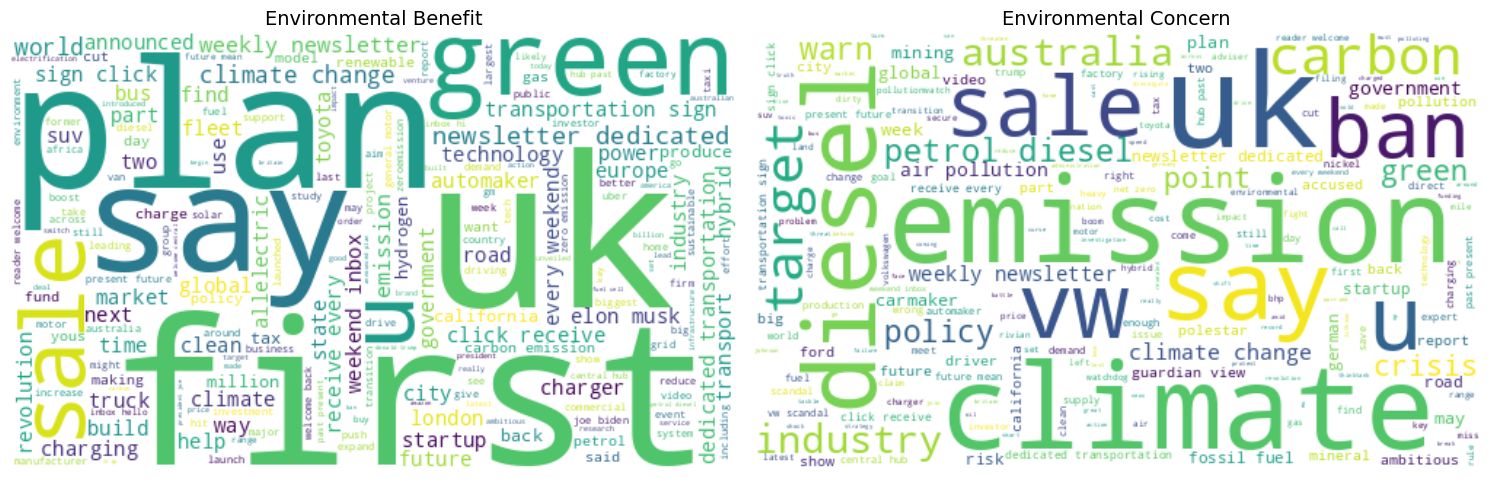

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Group data by label and concatenate sentences into a single string
grouped_text = df_all_reviews[df_all_reviews['Label'].isin(['Environmental Benefit', 'Environmental Concern'])].groupby("Label")["Cleaned_Description"].apply(lambda x: " ".join(x))

# Plot word clouds for each label
fig, axes = plt.subplots(1, len(grouped_text), figsize=(15, 5))

for i, (label, text) in enumerate(grouped_text.items()):
    wordcloud = WordCloud(width=500, height=300, background_color="white").generate(text)

    # Plot word cloud
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(label, fontsize=14)

plt.tight_layout()
plt.show()

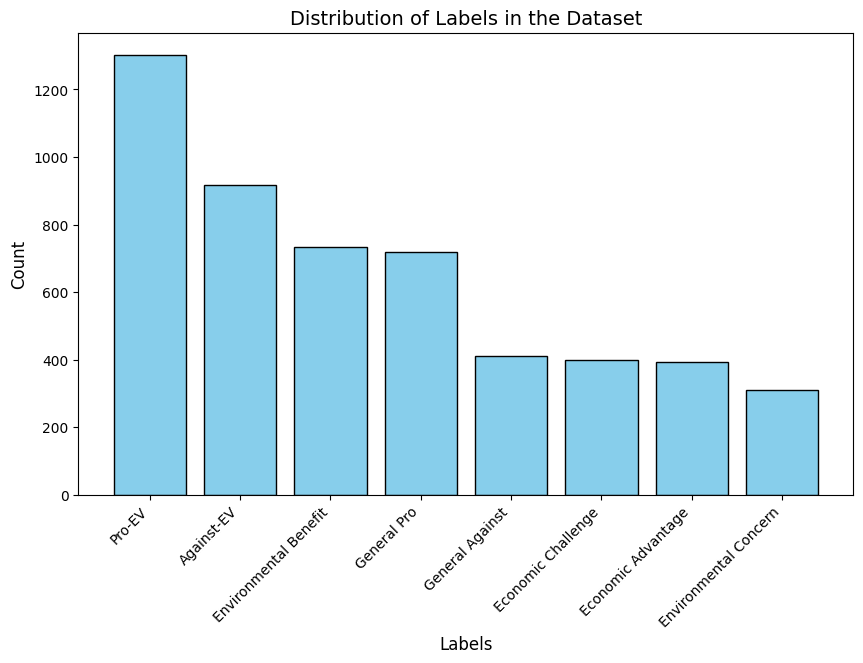

In [65]:
import matplotlib.pyplot as plt

# Counting the occurrences of each label
label_counts = df_all_reviews['Label'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black')

# Customizing the chart
plt.title("Distribution of Labels in the Dataset", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()


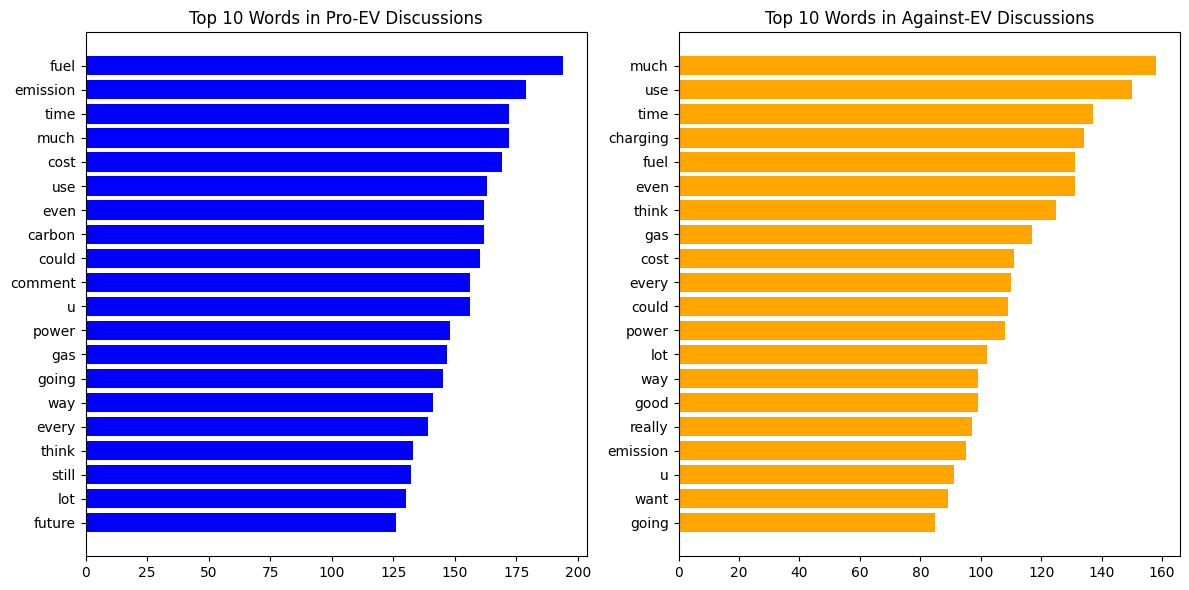

In [90]:
import matplotlib.pyplot as plt
from collections import Counter

# Separate Pro-EV and Against-EV data
pro_ev_data = df_all_reviews[df_all_reviews['Label'].str.contains("Pro", case=False, na=False)]
against_ev_data = df_all_reviews[df_all_reviews['Label'].str.contains("Against", case=False, na=False)]

# Tokenize words for Pro-EV and Against-EV
pro_ev_words = " ".join(pro_ev_data["Cleaned_Description"]).split()
against_ev_words = " ".join(against_ev_data["Cleaned_Description"]).split()

# Get the most common 10 words for each category
pro_ev_common_words = Counter(pro_ev_words).most_common(20)
against_ev_common_words = Counter(against_ev_words).most_common(20)

# Convert to DataFrame for visualization
pro_ev_df = pd.DataFrame(pro_ev_common_words, columns=["Word", "Frequency"])
against_ev_df = pd.DataFrame(against_ev_common_words, columns=["Word", "Frequency"])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pro-EV Bar Chart
axes[0].barh(pro_ev_df["Word"], pro_ev_df["Frequency"], color="blue")
axes[0].set_title("Top 10 Words in Pro-EV Discussions")
axes[0].invert_yaxis()

# Against-EV Bar Chart
axes[1].barh(against_ev_df["Word"], against_ev_df["Frequency"], color="orange")
axes[1].set_title("Top 10 Words in Against-EV Discussions")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


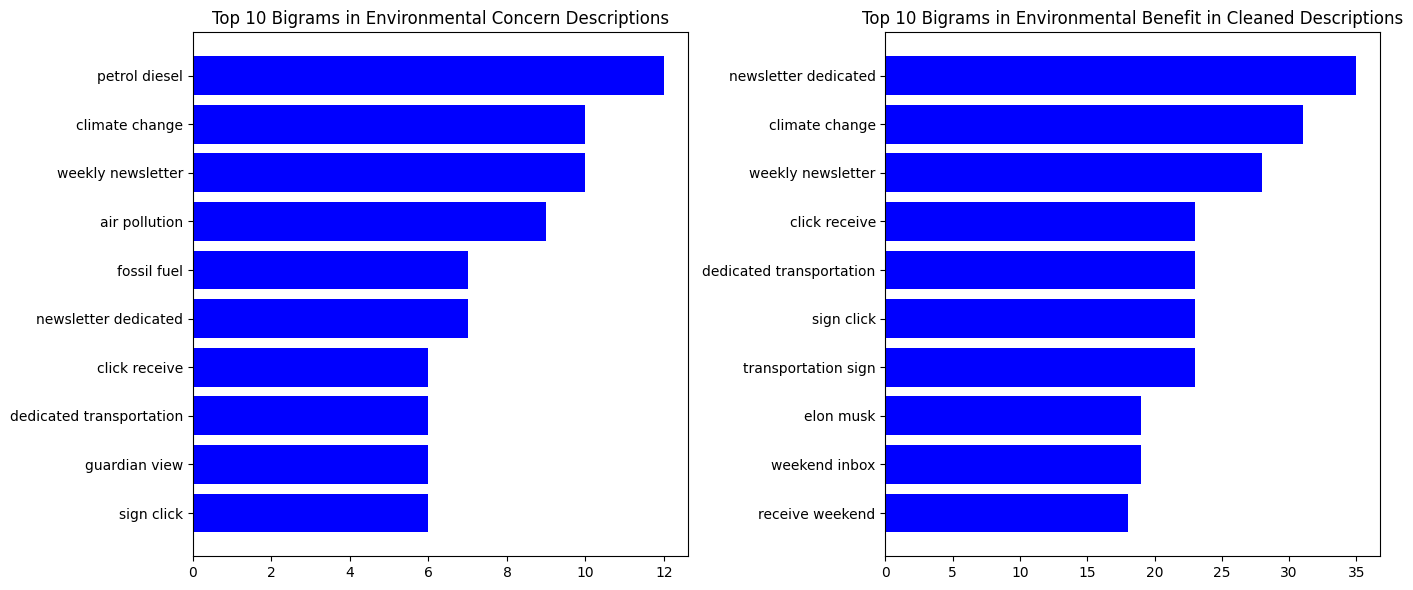

In [91]:


# Function to get top bigrams
def get_top_bigrams(corpus, n=10):
    """Extracts top n bigrams from the corpus."""
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    bigram_matrix = vectorizer.fit_transform(corpus)
    bigram_counts = bigram_matrix.toarray().sum(axis=0)
    bigram_freq = dict(zip(vectorizer.get_feature_names_out(), bigram_counts))
    return Counter(bigram_freq).most_common(n)

# Filter dataset for Environmental Concern and Environmental Benefit
env_concern_data = df_all_reviews[df_all_reviews['Label'] == "Environmental Concern"]["Cleaned_Description"]
env_benefit_data = df_all_reviews[df_all_reviews['Label'] == "Environmental Benefit"]["Cleaned_Description"]

# Extract top bigrams
top_bigrams_env_concern = get_top_bigrams(env_concern_data, n=10)
top_bigrams_env_benefit = get_top_bigrams(env_benefit_data, n=10)

# Convert to DataFrames for visualization
bigram_df_env_concern = pd.DataFrame(top_bigrams_env_concern, columns=["Bigram", "Frequency"])
bigram_df_env_benefit = pd.DataFrame(top_bigrams_env_benefit, columns=["Bigram", "Frequency"])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bigram plot
axes[0].barh(bigram_df_env_concern["Bigram"], bigram_df_env_concern["Frequency"], color="blue")
axes[0].set_title("Top 10 Bigrams in Environmental Concern Descriptions")
axes[0].invert_yaxis()

# Trigram plot
axes[1].barh(bigram_df_env_benefit["Bigram"], bigram_df_env_benefit["Frequency"], color="blue")
axes[1].set_title("Top 10 Bigrams in Environmental Benefit in Cleaned Descriptions")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [92]:
df_all_reviews_len["Cleaned_Description"].apply(lambda x: len(x.split())).describe()

,Cleaned_Description
count,5075.000000
mean,15.858522
std,15.151127
min,0.000000
25%,7.000000
50%,12.000000
75%,20.000000
max,99.000000


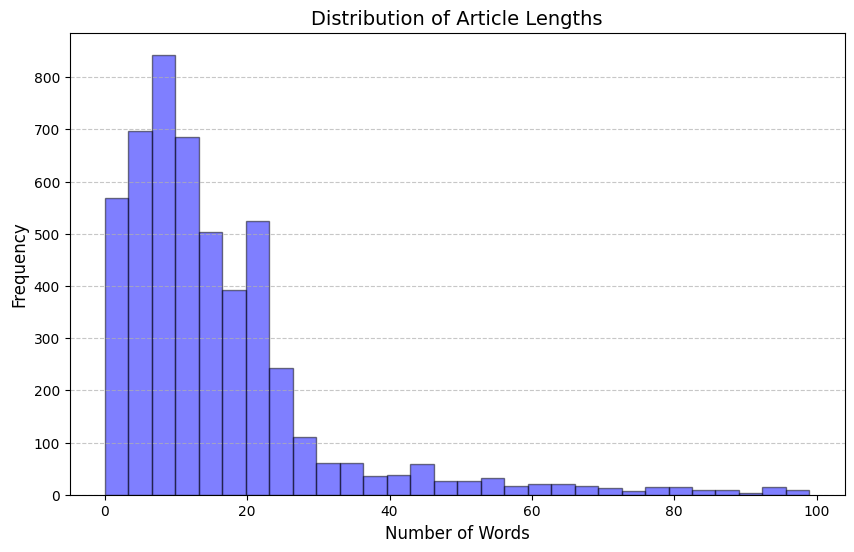

In [93]:
df_all_reviews_len = df_all_reviews.copy()
df_all_reviews_len["Article_Length"] = df_all_reviews_len["Cleaned_Description"].apply(lambda x: len(x.split()))
df_all_reviews_len = df_all_reviews_len[df_all_reviews_len['Article_Length']<100]
# Plot the distribution of article lengths
plt.figure(figsize=(10, 6))
plt.hist(df_all_reviews_len["Article_Length"], bins=30, color="blue", edgecolor="black", alpha=0.5)

# Customizing the chart
plt.title("Distribution of Article Lengths", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()